# Project 2 - IART - Supervised Learning
## Dry Beans Dataset

### Adriana Cruz Gonçalves & Tiago Filipe Lima Rocha
#### [Faculdade de Engenharia da Universidade do Porto](https://sigarra.up.pt/feup/pt/web_page.inicial)


## Table of contents

1. [Introduction](#Introduction)

2. [Required libraries](#Required-libraries)

3. [Dataset information](#Dataset-information)

4. [Data visualization](#Data-visualization)

5. [Test and validation dataset](#Test-and-validation-dataset)

6. [Algorithms used](#Algorithms-used)

7. [Build models](#Build-models)

8. [Test harness](#Test-harness)

9. [Select the best models](#Select-the-best-models)

    - [LR prediction](#LR-prediction)

    - [LDA prediction](#LDA-prediction)

    - [CART prediction](#CART-prediction)

10. [Principal Component Analysis](#Principal-Component-Analysis)

11. [Neural network approach](#Neural-network-approach)

12. [Conclusions](#Conclusions)

## Introduction

[[ go back to the top ]](#Table-of-contents)

As we all know from the nature, most creatures have the ability to recognize the
objects in order to identify food or danger. Human beings can also recognize the types
and application of objects. An interesting phenomenon could be that machines could
recognize objects just like us someday in the future. This project mainly focuses on
machine learning in pattern recognition applications.


Machine learning is the core of Artificial Intelligence (AI) and pattern recognition is also
an important branch of AI. In this project, the conception of machine learning and
machine learning algorithms are introduced, including neural networks. Moreover, a typical and simple machine
learning algorithm called K-means is introduced. A case study about Dry Beans classification
is introduced to show how the K-means works in pattern recognition.

A common machine learning task is supervised learning, in which you have a dataset with inputs and known outputs. The task is to use this dataset to train a model that predicts the correct outputs based on the inputs.
The aim of the case study is to design and implement a system of pattern recognition
for multiple species of Dry Beans based on Machine Learning. This project shows the workflow of
pattern recognition and how to use machine learning approach to achieve this goal.
The data set was collected from an open source website of machine learning. The
programming language used in this project was Python.


## Required libraries

[[ go back to the top ]](#Table-of-contents)

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **Scipy**:  Python-based ecosystem of open-source software for mathematics, science, and engineering.
* **Tensorflow**: TensorFlow is an open source library for numerical computation and large-scale machine learning.
* **Keras**: Keras is a central part of the tightly-connected TensorFlow 2.0 ecosystem, covering every step of the machine learning workflow, from data management to hyperparameter training to deployment solutions.

In [1]:
# Packages

import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import tensorflow as tf
import keras
import seaborn as sns

# Libraries

from pandas.plotting import scatter_matrix

from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import normalize, StandardScaler

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

pyplot.rcParams["figure.figsize"] = (20,15)

print(f"Python: {sys.version}")
print(f"scipy: {scipy.__version__}")
print(f"numpy: {numpy.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"pandas: {pandas.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"keras: {keras.__version__}")
print(f"tensorflow: {tf.__version__}")

Python: 3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]
scipy: 1.6.3
numpy: 1.19.5
matplotlib: 3.4.2
pandas: 1.2.4
sklearn: 0.24.2
keras: 2.5.0
tensorflow: 2.5.0


## Dataset information

[[ go back to the top ]](#Table-of-contents)

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

We first load the dataset using pandas, then we proceed to gather some information about the data:

**Dimensions of the dataset**
- to get a quick idea of how many instances (rows) and how many attributes (columns) the data contains we used the shape property.

**Peek at the data itself**
- We thought also always a good idea to actually eyeball our data, so we peeked at the first 20 rows.

**Statistical Summary**
- We also took a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

**Class Distribution**
- Finally we took a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [2]:
# Load dataset
names = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4", "Class"]
dataset = pandas.read_excel("dataset/Dry_Bean_Dataset.xls")

# Data information
print(f"\nDataset shape: {dataset.shape}\n\n---")
print(f"\nData head peak:\n\n {dataset.head(20)}\n\n---")
print(f"\nStatistical Summary: \n\n {dataset.describe()}\n\n---")
print(f"\nClass Distribution: \n\n {dataset.groupby('Class').size()}\n\n---\n")


Dataset shape: (13611, 17)

---

Data head peak:

      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   28395    610.291       208.178117       173.888747      1.197191   
1   28734    638.018       200.524796       182.734419      1.097356   
2   29380    624.110       212.826130       175.931143      1.209713   
3   30008    645.884       210.557999       182.516516      1.153638   
4   30140    620.134       201.847882       190.279279      1.060798   
5   30279    634.927       212.560556       181.510182      1.171067   
6   30477    670.033       211.050155       184.039050      1.146768   
7   30519    629.727       212.996755       182.737204      1.165591   
8   30685    635.681       213.534145       183.157146      1.165852   
9   30834    631.934       217.227813       180.897469      1.200834   
10  30917    640.765       213.560089       184.439871      1.157885   
11  31091    638.558       210.486255       188.326848      1.117665   
12  31107   

## Data visualization

[[ go back to the top ]](#Table-of-contents)

We now have a basic idea about the data. So we needed to extend that with some visualizations.
And so we decided to go for  two types of plots:

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

Given that the input variables are numeric, we can create box and whisker plots of each. This gives us a much clearer idea of the distribution of the input attributes.
We can also create a histogram of each input variable to get an idea of the distribution.
We also look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the beans can be segregated into different regions to be predicted.

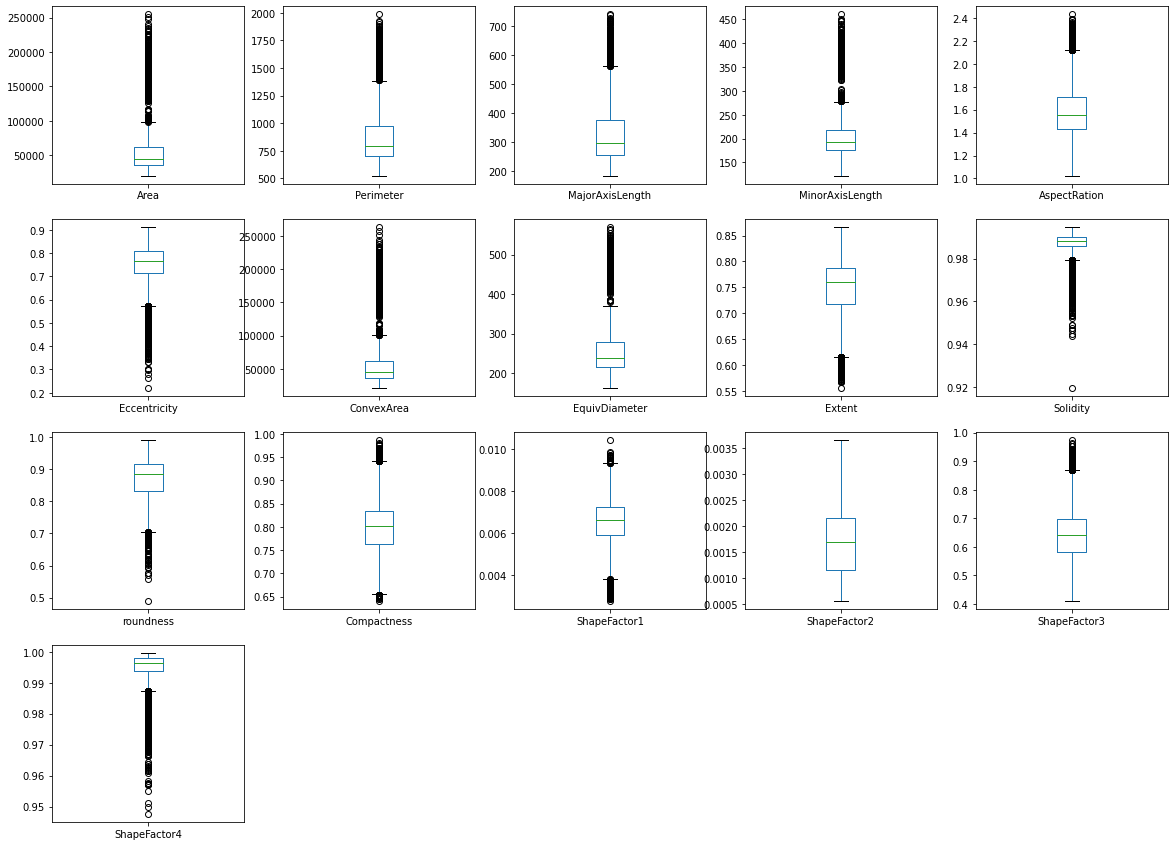

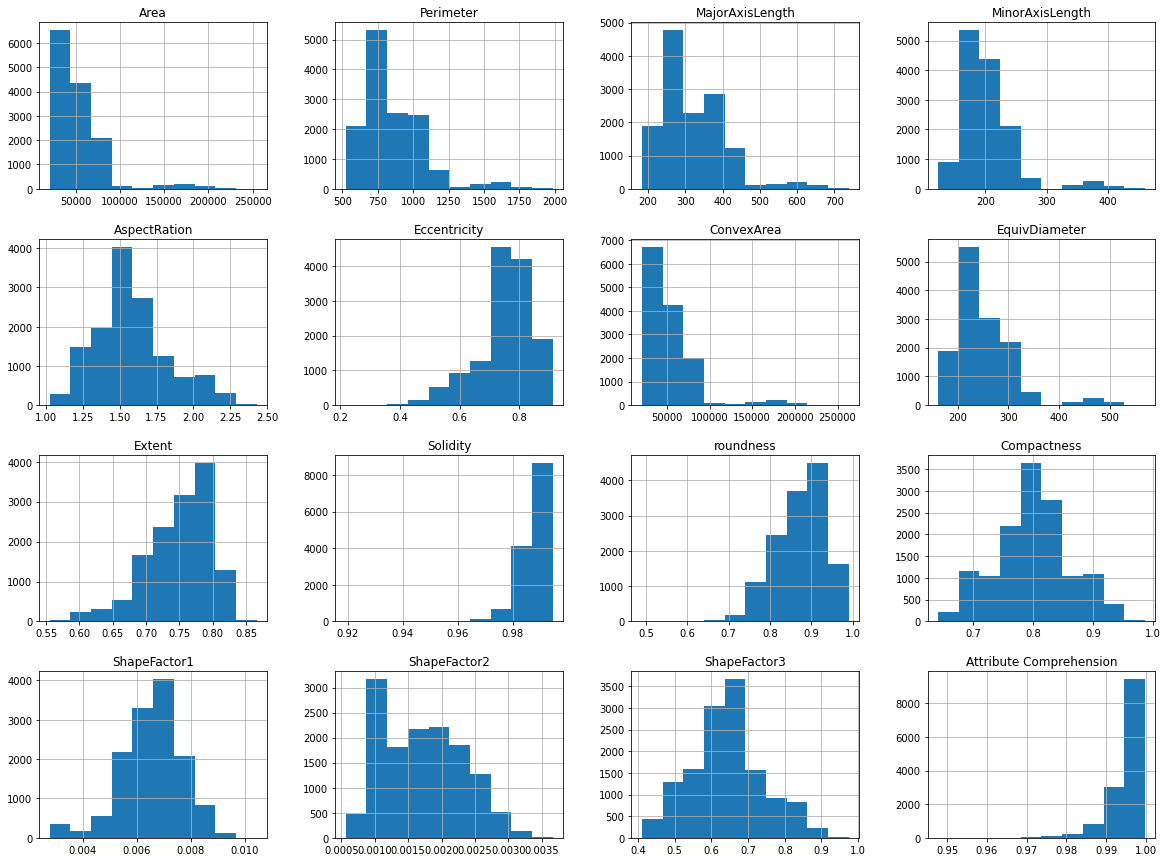

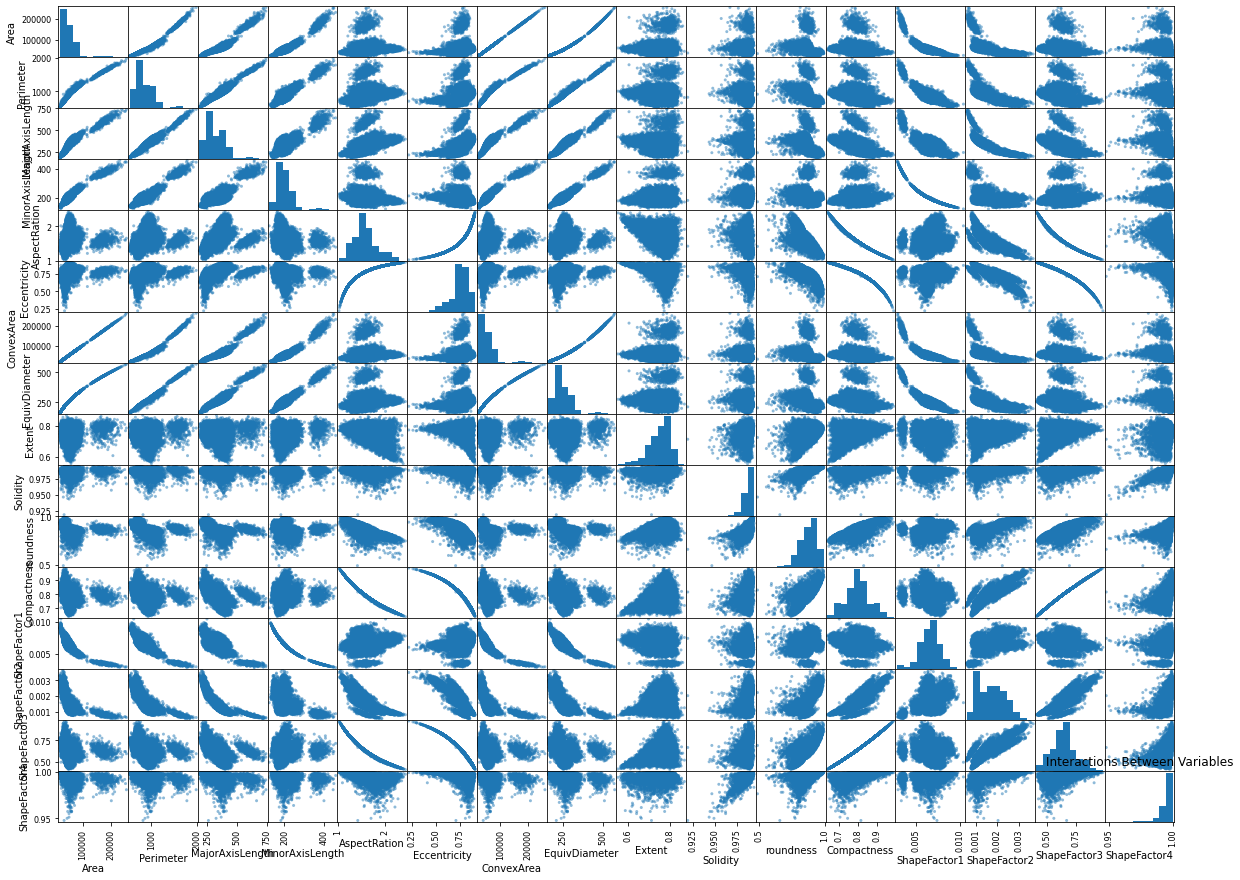

Text(0.5, 1.0, 'ShapeFactor1 vs ShapeFactor4')

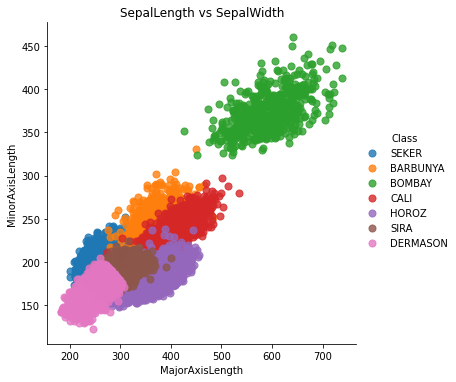

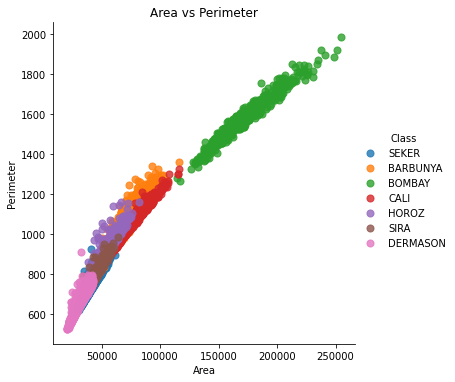

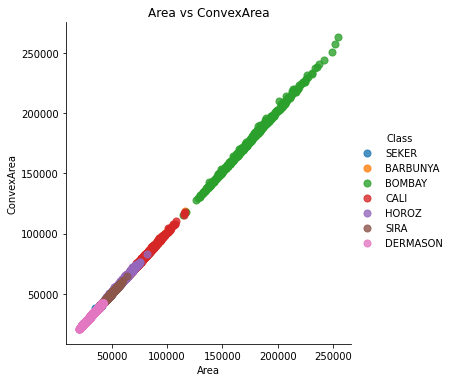

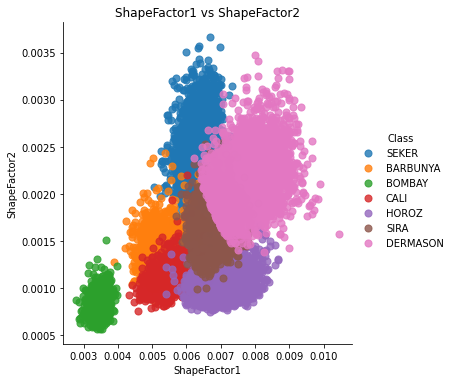

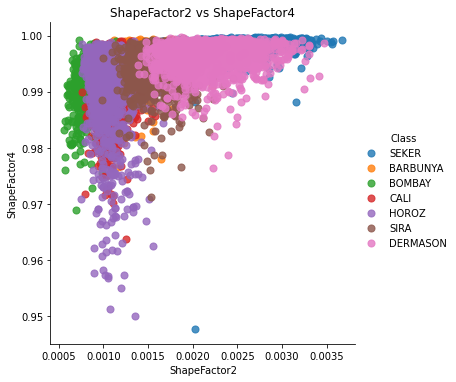

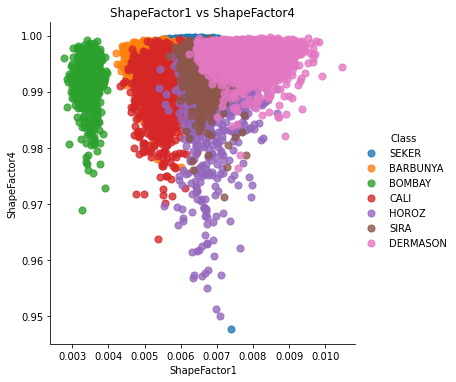

In [3]:
# Univariate plots
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4, 5), sharex=False, sharey=False)
pyplot.show()

# histograms
dataset.hist()
pyplot.title('Attribute Comprehension')
pyplot.show()

# Multivariate plots
# scatter plot matrix
scatter_matrix(dataset)
pyplot.title('Interactions Between Variables')
pyplot.show()

sns.lmplot(x='MajorAxisLength', y='MinorAxisLength',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('SepalLength vs SepalWidth')

sns.lmplot(x='Area', y='Perimeter',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('Area vs Perimeter')

sns.lmplot(x='Area', y='ConvexArea',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('Area vs ConvexArea')

sns.lmplot(x='ShapeFactor1', y='ShapeFactor2',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('ShapeFactor1 vs ShapeFactor2')

sns.lmplot(x='ShapeFactor2', y='ShapeFactor4',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('ShapeFactor2 vs ShapeFactor4')

sns.lmplot(x='ShapeFactor1', y='ShapeFactor4',
           data=dataset,
           fit_reg=False,
           hue="Class",
           scatter_kws={"marker": "D",
                        "s": 50})
pyplot.title('ShapeFactor1 vs ShapeFactor4')

## Test and validation dataset

[[ go back to the top ]](#Table-of-contents)

We need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [4]:
array = dataset.values
X = array[:,0:16]
y = array[:,16]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

We now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

## Algorithms used

[[ go back to the top ]](#Table-of-contents)

### Spot Check Algorithms

* **Logistic Regression (aka logit, MaxEnt) classifier**

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the 'multi_class' option is set to 'ovr', and uses the cross-entropy loss if the 'multi_class' option is set to 'multinomial'. (Currently the 'multinomial' option is supported only by the 'lbfgs', 'sag', 'saga' and 'newton-cg' solvers.)
    This class implements regularized logistic regression using the 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal

* **Linear Discriminant Analysis**

    A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes' rule.
    The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
    The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the transform method.

* **K Neighbors Classifier**

    Classifier implementing the k-nearest neighbors vote.

* **Decision Tree Classifier**

    The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
    The predict method operates using the numpy.argmax function on the outputs of predict_proba. This means that in case the highest predicted probabilities are tied, the classifier will predict the tied class with the lowest index in classes_.

* **Gaussian Naive Bayes**

    They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.
    For some types of probability models, naive Bayes classifiers can be trained very efficiently in a supervised learning setting. In many practical applications, parameter estimation for naive Bayes models uses the method of maximum likelihood; in other words, one can work with the naive Bayes model without accepting Bayesian probability or using any Bayesian methods.

* **C-Support Vector Classification**

    The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

### Model Evaluation Algorithms

* **Stratified K-Folds cross-validator**

    Provides train/test indices to split data in train/test sets.
    This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

### Prediction Evaluation

* **Accuracy classification score**

    In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

* **Confusion Matrix**

    Compute confusion matrix to evaluate the accuracy of a classification.
    By definition a confusion matrix C is such that Ci, j is equal to the number of observations known to be in group i and predicted to be in group j.
    Thus in binary classification, the count of true negatives is C0, 0, false negatives is C1, 0, true positives is C1, 1 and false positives is C0, 1.


## Build models

[[ go back to the top ]](#Table-of-contents)

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [5]:
# Spot Check Algorithms

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

## Test harness

[[ go back to the top ]](#Table-of-contents)

We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We are using the metric of ‘accuracy‘ to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [6]:
# evaluate each model in turn
results = []
names = []

print("Model Evaluation (mean / std):\n")
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)

	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Model Evaluation (mean / std):

LR: 0.867835 (0.010185)
LDA: 0.904297 (0.005905)
KNN: 0.722902 (0.017777)
CART: 0.893554 (0.008683)
NB: 0.764235 (0.006250)
SVM: 0.268277 (0.001576)


## Selecting the best model

[[ go back to the top ]](#Table-of-contents)

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we verified that LR, LDA and CART had the largest estimated accuracy score at about 0.867835 (0.010185 std), 0.904297 (0.005905 std) and 0.894748 (0.007176 std) respectively - so we decided to use the Decision Tree Classifier as a prediction model geting the following results:

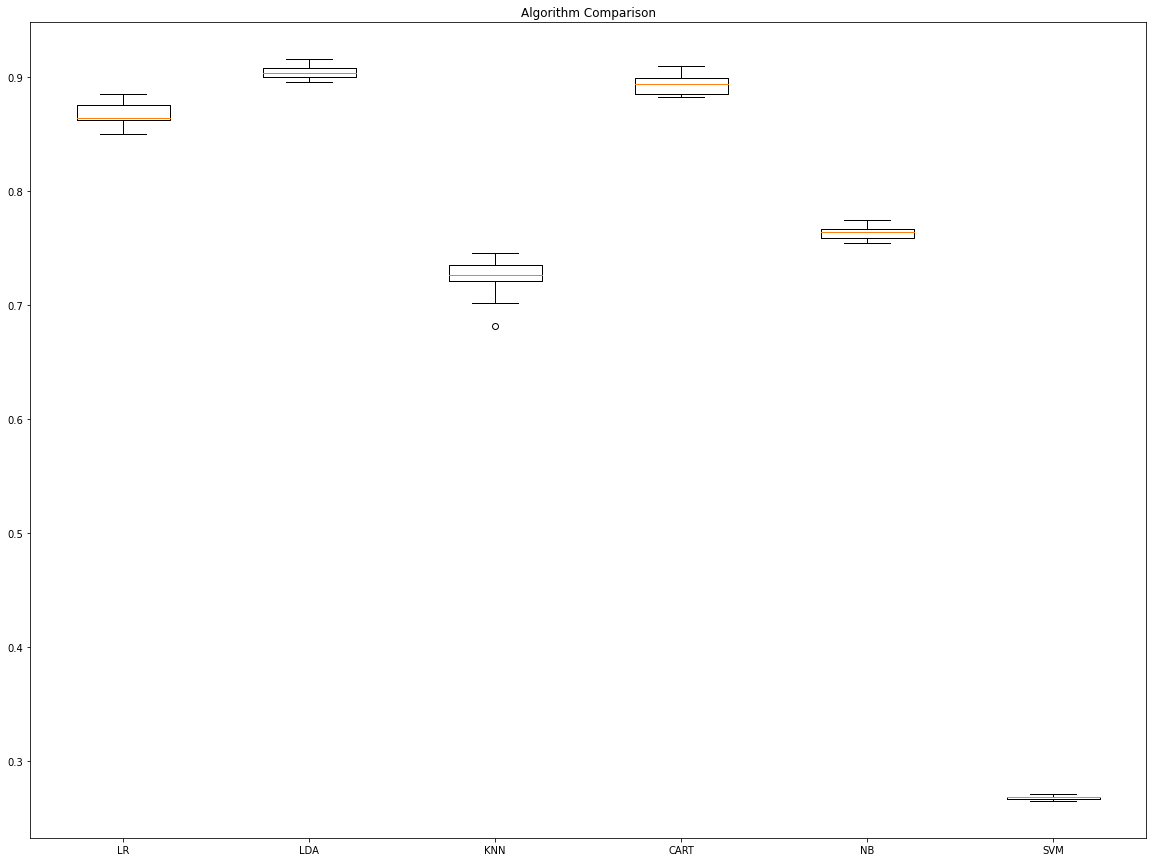

In [7]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### LR prediction

We can fit the model on the entire training dataset and make predictions on the validation dataset.

We can then evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

We can see that the accuracy is 0.868 or about 87% on the hold out dataset.

The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.

In [8]:
# Logistic Regression
# Predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Prediction Evaluation
print("\nPrediction Evaluation For Logistic Regression: \n")
print("\nAccuracy Score: ", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report: \n\n", classification_report(Y_validation, predictions))


Prediction Evaluation For Logistic Regression: 


Accuracy Score:  0.8688946015424165

Confusion Matrix: 

 [[221   0   4   0   2   1  42]
 [  0 103   0   0   0   0   0]
 [  6   1 218   0  20   0  88]
 [  6   0   0 648   1   5  45]
 [  7   0   7   3 363   0   6]
 [  5   0   0   8   0 372  20]
 [  3   0   4  53  13   7 441]]

Classification Report: 

               precision    recall  f1-score   support

    BARBUNYA       0.89      0.82      0.85       270
      BOMBAY       0.99      1.00      1.00       103
        CALI       0.94      0.65      0.77       333
    DERMASON       0.91      0.92      0.91       705
       HOROZ       0.91      0.94      0.92       386
       SEKER       0.97      0.92      0.94       405
        SIRA       0.69      0.85      0.76       521

    accuracy                           0.87      2723
   macro avg       0.90      0.87      0.88      2723
weighted avg       0.88      0.87      0.87      2723



### LDA prediction

Same approach.

We can see that the accuracy is 0.905 or about 90% on the hold out dataset with this algorithm.

The classification report also shows good results.

In [9]:
# Linear Discriminant Analysis
# Predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Prediction Evaluation
print("\nPrediction Evaluation For Linear Discriminant Analysis: \n")
print("\nAccuracy Score: ", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report: \n\n", classification_report(Y_validation, predictions))


Prediction Evaluation For Linear Discriminant Analysis: 


Accuracy Score:  0.9056188027910393

Confusion Matrix: 

 [[217   0  26   0   0   1  26]
 [  0 103   0   0   0   0   0]
 [  2   0 320   0   2   0   9]
 [  1   0   0 608   1   5  90]
 [  0   0  11   0 361   0  14]
 [  2   0   0   7   0 367  29]
 [  0   0   0  23   5   3 490]]

Classification Report: 

               precision    recall  f1-score   support

    BARBUNYA       0.98      0.80      0.88       270
      BOMBAY       1.00      1.00      1.00       103
        CALI       0.90      0.96      0.93       333
    DERMASON       0.95      0.86      0.91       705
       HOROZ       0.98      0.94      0.96       386
       SEKER       0.98      0.91      0.94       405
        SIRA       0.74      0.94      0.83       521

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.92      0.91      0.91      2723



### CART prediction

Same approach.

We can see that the accuracy is 0.901 or about 90% on the hold out dataset with this algorithm

The classification report also shows good results.

In [10]:
# Decision Tree
# Predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Prediction Evaluation
print("\nPrediction Evaluation For Decision Tree Classifier: \n")
print("\nAccuracy Score: ", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix: \n\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report: \n\n", classification_report(Y_validation, predictions))


Prediction Evaluation For Decision Tree Classifier: 


Accuracy Score:  0.9026808666911494

Confusion Matrix: 

 [[237   0  20   1   4   2   6]
 [  0 103   0   0   0   0   0]
 [ 30   0 296   0   4   1   2]
 [  1   0   0 636   1   9  58]
 [  1   0   4   2 366   0  13]
 [  2   0   1   9   0 380  13]
 [  2   0   2  50  15  12 440]]

Classification Report: 

               precision    recall  f1-score   support

    BARBUNYA       0.87      0.88      0.87       270
      BOMBAY       1.00      1.00      1.00       103
        CALI       0.92      0.89      0.90       333
    DERMASON       0.91      0.90      0.91       705
       HOROZ       0.94      0.95      0.94       386
       SEKER       0.94      0.94      0.94       405
        SIRA       0.83      0.84      0.84       521

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



## Principal Component Analysis

[[ go back to the top ]](#Table-of-contents)

One finding we thought was a bit weird was the accuracy score for the SVM model - it was a bit too low, given those models usually give the best results.
So we decided to try and approach the problem slightly differently.

Given the nature of all numerical variables, we will perform PCA on the dataset to see if we can drop some of the variables.
So we first setup all the numerical variables, then normalise the data and perform PCA on the dataset.

PCA is effected by scale, so we need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data

In [11]:
features = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]

# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['Class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

#### PCA Projection to 2D

The original data has 16 columns ("Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"). In this section, the code projects the original data which is 16 dimensional into 2 dimensions. We should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

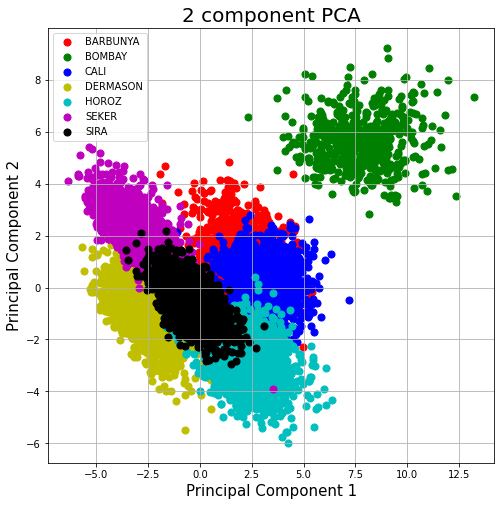

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pandas.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

final_df = pandas.concat([principal_df, dataset[['Class']]], axis = 1)

fig = pyplot.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ["BARBUNYA", "BOMBAY", "CALI", "DERMASON", "HOROZ", "SEKER", "SIRA"]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'black']

for target, color in zip(targets, colors):
    indicesToKeep = final_df['Class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Standardize the Data

PCA is effected by scale, so we need to scale the features in the data before applying PCA. We can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note we fit on the training set and transform on the training and test set. If we want to see the negative effect not scaling our data can have, scikit-learn has a section on the effects of not standardizing data.

In [13]:
array = dataset.values
X = array[:,0:16]
y = array[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Apply PCA
PCA can be used  to compress high dimensional data to lower dimensional data and also take the compressed representation of the data (lower dimensional data) back to an approximation of the original high dimensional data.

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

Thus we can use PCA to speed up the fitting of machine learning algorithms, and as the results show it does its job well.

In [14]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# SVC
# Predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Prediction Evaluation
print("\nPrediction Evaluation For Support Vector Classification with Applied PCA: \n")
print("\nAccuracy Score: ", accuracy_score(Y_test, predictions))
print("\nConfusion Matrix: \n\n", confusion_matrix(Y_test, predictions))
print("\nClassification Report: \n\n", classification_report(Y_test, predictions))


Prediction Evaluation For Support Vector Classification with Applied PCA: 


Accuracy Score:  0.8997429305912596

Confusion Matrix: 

 [[188   0  68   0   0   1  13]
 [  0 103   0   0   0   0   0]
 [ 31   0 296   0   4   0   2]
 [  0   0   0 660   1   5  39]
 [  1   0   5   2 370   0   8]
 [  3   0   0  10   0 377  15]
 [  5   0   0  46   8   6 456]]

Classification Report: 

               precision    recall  f1-score   support

    BARBUNYA       0.82      0.70      0.76       270
      BOMBAY       1.00      1.00      1.00       103
        CALI       0.80      0.89      0.84       333
    DERMASON       0.92      0.94      0.93       705
       HOROZ       0.97      0.96      0.96       386
       SEKER       0.97      0.93      0.95       405
        SIRA       0.86      0.88      0.87       521

    accuracy                           0.90      2723
   macro avg       0.91      0.90      0.90      2723
weighted avg       0.90      0.90      0.90      2723



## Neural network approach

[[ go back to the top ]](#Table-of-contents)

This kernel uses multilayer perceptrons (Neural Network) to predict the species of the Dry Beans dataset. Neural network is a machine learning algorithm which is inspired by a neuron.

A neuron consists of a dendrite and an axon which are responsible for collecting and sending signals. For our artificial neural network, the concept works similar in which a lot of neurons are connected to each layer with its own corresponding weight and biases.

Although there are currently architecture of neural network, multilayer perceptron is being used as the architecture to prevent overfitting (training accuracy=good but test accuracy=bad) to the Dry Beans Species due to less feature.

Coding below convert the species into each respective category to be feed into the neural network

In [15]:
print(dataset["Class"].unique())

dataset.loc[dataset["Class"]=="SEKER", "Class"]=0
dataset.loc[dataset["Class"]=="BARBUNYA", "Class"]=1
dataset.loc[dataset["Class"]=="BOMBAY", "Class"]=2
dataset.loc[dataset["Class"]=="CALI", "Class"]=3
dataset.loc[dataset["Class"]=="HOROZ", "Class"]=4
dataset.loc[dataset["Class"]=="SIRA", "Class"]=5
dataset.loc[dataset["Class"]=="DERMASON", "Class"]=6

X = dataset.iloc[:,0:16].values
y = dataset.iloc[:,16].values

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


#### Normalization and Test harness

In order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing.

In [16]:
X_normalized = normalize(X, axis=0)

#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length = len(dataset)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

print("Length of train set x:", X_train.shape[0],"y:", y_train.shape[0])
print("Length of test set x:", X_test.shape[0],"y:", y_test.shape[0])

#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
...
'''
y_train = np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

model = Sequential()
model.add(Dense(1000, input_dim=16, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=50, verbose=1)

prediction = model.predict(X_test)
length = len(prediction)
y_label = numpy.argmax(y_test, axis=1)
predict_label = numpy.argmax(prediction, axis=1)

accuracy = numpy.sum(y_label == predict_label)/length * 100
print("Accuracy of the dataset", accuracy)

Length of train set x: 10888 y: 10888
Length of test set x: 2723 y: 2723
Shape of y_train (10888, 7)
Shape of y_test (2723, 7)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              17000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 2107      
Total params: 669,907
Trainable params: 669,907
Non-trainable params: 0
_______________________________________________________

## Conclusions

[[ go back to the top ]](#Table-of-contents)

In basic terms, the goal of using AI is to make computers think as humans do. The goal of supervised learning tasks is to make predictions for new, unseen data.

In general, our implementations were able to successfully make predictions with relatively high fidelity
 rates.
Machine learning (ML) and deep learning (DL) are also approaches to solving problems. The difference between these techniques and a Python script is that ML and DL use training data instead of hard-coded rules, but all of them can be used to solve problems using AI.

Accuracy rates above 90% were achieved using machine learning algorithms, which points to an overall good understanding and manipulation of the data.

An accuracy of 46% is achieved using a neural network, which is not great. It can, however, be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.

Further improvement:

1. Adding batch normalization

2. Adding dropout layer to prevent overfitting

3. Better parametrization

By doing these 3 steps above, no doubt we would have gotten better results with the neural network approach.

Machine Learning uses advanced algorithms that parse data, learns from it, and use those learnings to discover meaningful patterns of interest. Whereas a Neural Network consists of an assortment of algorithms used in Machine Learning for data modelling using graphs of neurons. Both are pretty good solutions to supervised learning problems when used appropriately.